In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
FILE_NAME = 'b_fastneutrons.pkl'
df = pd.read_pickle(FILE_NAME)

In [5]:
df.head()

,gtid,mcid,subid,inner_hit,inner_hit_prev,id_plus_dr_hit,veto_hit,veto_plus_dr_hit,veto_hit_prev,pe,innerPE,vetoPE,n9,n9_prev,nOff,n100,n100_prev,n400,n400_prev,nX,nX_prev,good_pos,good_pos_prev,good_dir,good_dir_prev,x,y,z,t,u,v,w,azimuth_ks,azimuth_ks_prev,distpmt,mc_energy,mcx,mcy,mcz,mct,mcu,mcv,mcw,closestPMT,closestPMT_prev,dxPrevx,dyPrevy,dzPrevz,drPrevr,drPrevrQFit,dxmcx,dymcy,dzmcz,drmcr,dt_sub,dt_prev_us,timestamp,num_tested,best_like,worst_like,average_like,average_like_05m
0,1,35,0,10,0,17,0,0,0,11.460295,11.460295,0.0,8.0,0.0,4.0,10.0,0.0,10.0,0.0,8.0,0.0,0.789278,0.000000,0.648118,0.000000,-5410.972290,115.584459,-5231.442871,-31.006592,0.499171,-0.064281,0.864116,0.254855,0.000000,542.238795,971.433350,-5780.381514,1267.406819,-8162.069238,0.000000,0.039815,-0.636746,0.770045,287.793344,0.000000,0.000000,0.000000,0.000000,0.000000,-999999.99,369.409224,-1151.822359,2930.626367,3170.446156,44830.671875,1.811148e+09,1.811148e+09,46,-39.944118,-64.162354,-45.441990,-47.000507
1,2,170,0,20,10,26,0,0,0,25.446104,25.446104,0.0,17.0,8.0,1.0,19.0,10.0,19.0,10.0,17.0,8.0,0.838849,0.789278,0.388606,0.648118,-3644.729614,-4685.351868,2142.980194,-4.913208,0.146642,0.964007,-0.221782,0.295343,0.254855,-279.212094,148.939896,-5744.316139,-7454.879993,-197.722908,0.000000,0.625811,0.589058,0.511245,-236.040438,287.793344,1766.242676,-4800.936327,7374.423065,8975.005201,-999999.99,2099.586525,2769.528125,2340.703102,4190.159976,42.877274,5.987450e+09,7.798598e+09,102,-26.860764,-77.578056,-41.626789,-43.895313
2,3,968,0,13,20,19,0,0,0,12.569269,12.569270,0.0,9.0,17.0,0.0,12.0,19.0,13.0,19.0,9.0,17.0,0.817432,0.838849,0.678714,0.388606,1930.450287,-5140.690308,-5948.630981,-11.479675,-0.223983,0.540341,0.811088,0.582609,0.295343,-306.540184,364.926514,2745.886785,-6309.694033,-8155.102040,0.000000,-0.277808,0.640063,0.716339,-248.630981,-236.040438,5575.179901,-455.338440,-8091.611176,9836.876305,-999999.99,-815.436498,1169.003726,2206.471058,2626.789090,3418.414062,4.205355e+10,4.985215e+10,59,-40.513748,-68.447044,-45.688889,-46.814968
3,4,968,1,22,13,37,0,0,0,23.591473,23.591472,0.0,18.0,9.0,1.0,23.0,12.0,26.0,13.0,18.0,9.0,0.814494,0.817432,0.584598,0.678714,2021.343994,-5126.560059,-6149.542236,-7.686523,-0.150731,0.477766,0.865460,0.492760,0.582609,-519.425937,364.926514,1944.139476,-4462.483905,-6087.760636,13.877545,-0.277808,0.640063,0.716339,-449.542236,-248.630981,90.893707,14.130249,-200.911255,220.967559,-999999.99,77.204518,-664.076153,-61.781601,671.397528,15360.767578,1.175000e+01,4.985215e+10,154,-55.290619,-124.414581,-76.677658,-78.842926
4,5,1616,0,22,22,29,0,0,0,21.095167,21.095168,0.0,15.0,18.0,0.0,21.0,23.0,24.0,26.0,15.0,18.0,0.734204,0.814494,0.267561,0.584598,-4105.549622,-2951.700745,4786.076660,-7.734741,0.704655,0.709526,-0.005781,0.225727,0.492760,651.413661,470.497040,-4293.614775,-8450.047557,3282.345016,0.000000,0.517760,0.848060,0.112774,643.511596,-449.542236,-6126.893616,2174.859314,10935.618896,12722.287493,-999999.99,188.065154,5498.346812,1503.731644,5703.366990,9267.703125,3.566026e+10,8.551242e+10,104,-46.699371,-87.276482,-59.234688,-61.327457


### Clean out the non-constructed events

In [6]:
def clean_data(df):
    df_cleaned = df[df['azimuth_ks']>0]
    return df_cleaned

In [7]:
df = clean_data(df)

In [8]:
# what = df.columns.values
# new_labels = np.asarray([f.decode('utf-8') for f in what])
# df.columns = new_labels

Assuming dimensions of space (x, y, z, r) are in cm

## Dimensions

| Variable | Description | Units |
| --- | --- | --- |
| gtid | Event ID in frame | -- |
| mcid | Eveny ID in MC process | -- |
| subid | Sub-event id | -- |
| inner_hit | Number of PMT hits from inside vol | # PMTs |
| inner_hit_prev | inner_hit from previous event <br> (same of all X_prev variables) | # PMTs |
| **id_plus_dr_hit** | ?? | ?? |  
| veto_hit | # hits from veto PMTs | # PMTs |
| **veto_plus_dr_hit** | ?? | ?? | 
| pe | total area from all hits | PE (photoelectrons) | 
| innerPE | area from inner_hit | PE (photoelectrons) | 
| vetoPE | area from veto_hit | PE (photoelectrons) | 
| n9 | prompt light collected (+6ns and -3ns) | **hits?** |
| nOff | ?? | hits |
| n100 | 100ns window of hits | hits |
| n400 | 400ns window of hits | hits |
| nX | variable prompt measurement | hits |
| **good_dir** | ?? | ?? |
| x, y, z | vertex (prompt?) (reconstructed) | mm |
| **t, u, v, w** | time, direction of Cerenkov cone | us, ?? |
| **azimuth_ks** | ks test on azimuthal measurement (isotropy) | -- |
| **distpmt** | ?? (avg dist to PMTs with hits?) dist to aall? | mm |
| **mc_energy** | True Energy of ?? (neutron, deposited?) | ?? | 
| mcx, mcy, mcz | Truth position (prompt?) | mm |
| mct, mcu, mcv, mcw | Truth t, u, v, w variables | us, -- |
| **closestPMT** | distance to closest PMT hit? (to wall?) | mm |
| dxPrevx, dyPrevy, dzPrevz, drPrevr | difference in position between this and prev event | mm |
| drPrevrQFit | diff in r position using QFit algo? | mm |
| dxmcx, dxmcy, dxmcz, drmcr | diff in MC truth/reconstructed position | mm |
| dt_sub | Time between sub events?? | ?? |
| dt_prev_us | time difference between last event | us | 
| timestamp | MC(?) time of event | us |
| **num_tested** | ?? | ?? |
| **best_like**, **worst_like, average_like, average_like_05m** | ?? | ?? |

In [12]:
print(df.keys())

Index(['gtid', 'mcid', 'subid', 'inner_hit', 'inner_hit_prev',
       'id_plus_dr_hit', 'veto_hit', 'veto_plus_dr_hit', 'veto_hit_prev', 'pe',
       'innerPE', 'vetoPE', 'n9', 'n9_prev', 'nOff', 'n100', 'n100_prev',
       'n400', 'n400_prev', 'nX', 'nX_prev', 'good_pos', 'good_pos_prev',
       'good_dir', 'good_dir_prev', 'x', 'y', 'z', 't', 'u', 'v', 'w',
       'azimuth_ks', 'azimuth_ks_prev', 'distpmt', 'mc_energy', 'mcx', 'mcy',
       'mcz', 'mct', 'mcu', 'mcv', 'mcw', 'closestPMT', 'closestPMT_prev',
       'dxPrevx', 'dyPrevy', 'dzPrevz', 'drPrevr', 'drPrevrQFit', 'dxmcx',
       'dymcy', 'dzmcz', 'drmcr', 'dt_sub', 'dt_prev_us', 'timestamp',
       'num_tested', 'best_like', 'worst_like', 'average_like',
       'average_like_05m'],
      dtype='object')


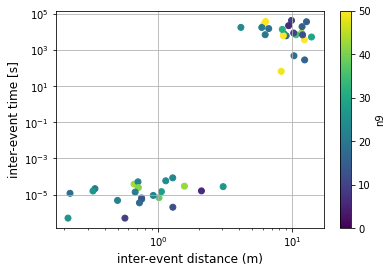

In [40]:
plt.scatter(df['drPrevr']/1e3, df['dt_prev_us']/1e6, 
            c=df['n9'], 
           vmin=0, vmax=50, 
           )
plt.colorbar(label='n9', )
plt.xlabel('inter-event distance (m)', fontsize=12)
plt.ylabel('inter-event time [s]', fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.grid()

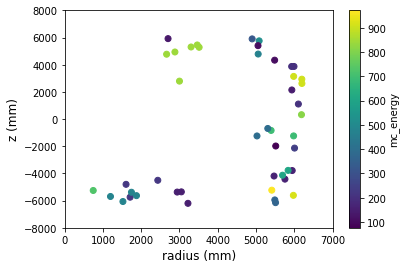

In [56]:
plt.scatter(np.sqrt(df['x']**2+df['y']**2), 
            df['z'], 
            c=df['mc_energy'], #vmin=0, vmax=50
           )
plt.colorbar(label='mc_energy')
plt.xlim(0, 7000)
plt.ylim(-8000, 8000)
plt.ylabel('z (mm)', fontsize=12)
plt.xlabel('radius (mm)', fontsize=12)
plt.show()

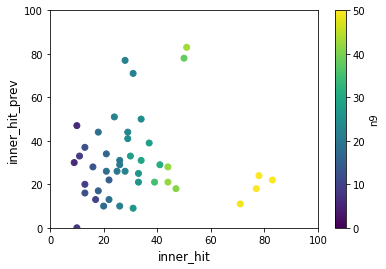

In [72]:
plt.scatter(df['inner_hit'], df['inner_hit_prev'], 
           c=df['n9'], vmin=0, vmax=50)
plt.colorbar(label='n9')
plt.xlabel('inner_hit', fontsize=12)
plt.ylabel('inner_hit_prev', fontsize=12)
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

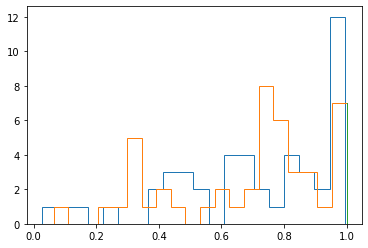

In [76]:
plt.hist(df['w']**2+df['v']**2, bins=20, histtype='step')
plt.hist(df['u']**2+df['v']**2, bins=20, histtype='step')
plt.hist(df['u']**2+df['w']**2+df['v']**2, bins=20, histtype='step')
# plt.xlim(0,1e4)
plt.show()

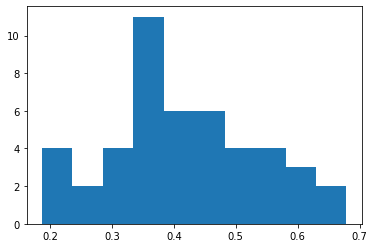

In [64]:
plt.hist(df['good_dir'])
plt.show()

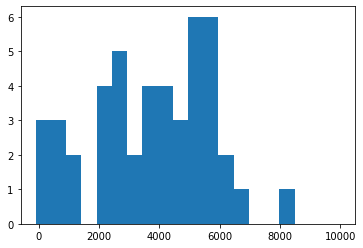

In [27]:
plt.hist(df['drmcr'], bins=20, range=[-1e2,1e4])
# plt.xlim(0,1e4)
plt.show()

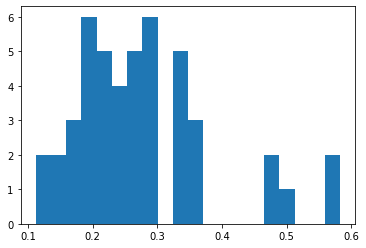

In [29]:
plt.hist(df['azimuth_ks'], bins=20)
# plt.xlim(0,1e4)
plt.show()

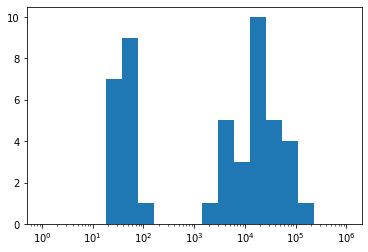

In [46]:
plt.hist(df['dt_sub'], bins=np.logspace(0,6,20))
# plt.xlim(0,1e4)
plt.xscale('log')
plt.show()